## Gaps and Inside Bars

In [1]:
import pandas as pd
df = pd.read_excel("Nifty50_with_1st_15min.xlsx", parse_dates=["Date"], index_col="Date")

In [2]:
df['TRR_Prev'] = df['True_Range_ratio'].shift(1)
df['TRR_Next'] = df['True_Range_ratio'].shift(-1)
df['OPR_Next'] = df['OPR'].shift(-1)
df['CPR_Next'] = df['CPR'].shift(-1)
df['CPR_Prev'] = df['CPR'].shift(1)
df['OPR_Prev'] = df['OPR'].shift(1)
df['Prev_Close'] = df['Close'].shift(1)
df['Open-Low%'] = ((df['Open'] - df['Low'])/df['Prev_Close'])*100
df['Open-High%'] = ((df['High'] - df['Open'])/df['Prev_Close'])*100
df['Range~Prev_Close'] = ((df['High'] - df['Low'])/df['Prev_Close'])*100 

In [3]:
df['True_Range_ratio_30'] = ((df['High_30'] - df['Low_30'])/df['Prev_Close'])*100
df["OPR_30"] = (df['Open_30'] - df['Low_30'])/(df['High_30'] - df['Low_30'])
df["CPR_30"] = (df['Close_30'] - df['Low_30'])/(df['High_30'] - df['Low_30'])
df["Solid_30"] = (abs(df['Open_30'] - df['Close_30']))/(df['High_30'] - df['Low_30'])

In [4]:
df['Upper'] = ((df['High'] - df['High_30'])/df['Prev_Close'])*100
df['Lower'] = ((df['Low_30'] - df['Low'])/df['Prev_Close'])*100
df["Close~15min-High"] = ((df['Close'] - df['High_30'])/df['Prev_Close'])*100
df["Close~15min-Low"] = ((df['Low_30'] - df['Close'])/df['Prev_Close'])*100

In [5]:
df.shape

(2349, 30)

In [6]:
df[['True_Range_ratio', 'TRR_Next', 'TRR_Prev']].head()

,True_Range_ratio,TRR_Next,TRR_Prev
Date,,,
2010-01-04,1.363671,0.870611,NaN
2010-01-05,0.870611,0.961793,1.363671
2010-01-06,0.961793,1.098212,0.870611
2010-01-07,1.098212,0.801762,0.961793
2010-01-08,0.801762,1.131558,1.098212


### Lets start with Gaps!!

In [7]:
df['Gap%'] = ((df['Open'] - df['Prev_Close'])/df['Prev_Close'])*100

In [8]:
df['Gap%'].describe()

count    2348.000000
mean        0.107669
std         0.699364
min        -9.144236
25%        -0.095109
50%         0.101035
75%         0.345528
max         7.273194
Name: Gap%, dtype: float64

In [9]:
df['Abs_Gap%'] = ((abs(df['Open'] - df['Prev_Close']))/df['Prev_Close'])*100

In [10]:
df['Abs_Gap%'].describe()

count    2348.000000
mean        0.402440
std         0.581962
min         0.000000
25%         0.098523
50%         0.263257
75%         0.486276
max         9.144236
Name: Abs_Gap%, dtype: float64

In [11]:
df['Abs_Gap%'][(df['OPR_Prev'] >= 0.8) & (df['CPR_Prev'] <= 0.2)].describe() 

count    332.000000
mean       0.435663
std        0.604533
min        0.000635
25%        0.095289
50%        0.266772
75%        0.533202
max        5.031230
Name: Abs_Gap%, dtype: float64

In [12]:
df['Abs_Gap%'][(df['CPR_Prev'] >= 0.80) & (df['OPR_Prev'] <= 0.2)].describe()

count    314.000000
mean       0.443113
std        0.864473
min        0.000000
25%        0.097373
50%        0.232889
75%        0.434572
max        9.144236
Name: Abs_Gap%, dtype: float64

In [13]:
df['Gap%'][(df['CPR_Prev'] >= 0.80) & (df['OPR_Prev'] <= 0.2)].describe()

count    314.000000
mean       0.153421
std        0.959520
min       -9.144236
25%       -0.021700
50%        0.138325
75%        0.341355
max        7.273194
Name: Gap%, dtype: float64

In [14]:
df['Gap%'][(df['OPR_Prev'] >= 0.80) & (df['CPR_Prev'] <= 0.2)].describe() 

count    332.000000
mean       0.030919
std        0.744900
min       -5.031230
25%       -0.193248
50%        0.024702
75%        0.324972
max        4.484277
Name: Gap%, dtype: float64

#### After uptrending day, around 70% of the time, it opens gap up, the next day

### Large Gaps

In [15]:
df['OPR'][ (((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))) & (df['Gap%'] > 0.3)].describe()

count    275.000000
mean       0.801702
std        0.219920
min        0.136838
25%        0.652385
50%        0.898892
75%        0.974777
max        1.000000
Name: OPR, dtype: float64

(array([  0.,   2.,   6.,  12.,  18.,  21.,  19.,  15.,  45., 137.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

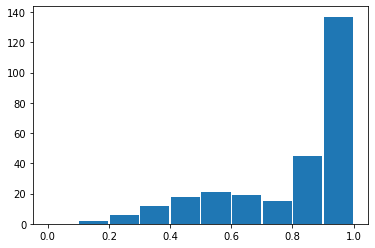

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
bin_range = (0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)

plt.hist(df['OPR'][ (((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))) & (df['Gap%'] > 0.3)],rwidth=0.95,bins=bin_range)

In [17]:
df['OPR'][ (((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))) & (df['Gap%'] < -0.15)].describe()

count    146.000000
mean       0.780448
std        0.248739
min        0.080764
25%        0.628186
50%        0.906986
75%        0.979966
max        1.000000
Name: OPR, dtype: float64

(array([ 1.,  5.,  3.,  7.,  7., 11., 12.,  8., 16., 76.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

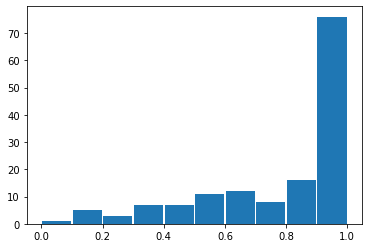

In [18]:
plt.hist(df['OPR'][ (((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))) & (df['Gap%'] < -0.15)],rwidth=0.95,bins=bin_range)

#### This clearly suggests that first 15min red candle after gap down or gap up, open is a very good directional signal on the bearish side

In [19]:
df['OPR'][ (((df['OPR_30'] < 0.7) & (df['CPR_30'] > 0.7)) | ((df['OPR_30'] < 0.2) & (df['CPR_30'] > 0.6))) & (df['Gap%'] < -0.15) ].describe()

count    170.000000
mean       0.286113
std        0.258156
min        0.000000
25%        0.062651
50%        0.192689
75%        0.478704
max        0.985894
Name: OPR, dtype: float64

(array([59., 26., 16., 18., 13., 12., 10.,  7.,  7.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

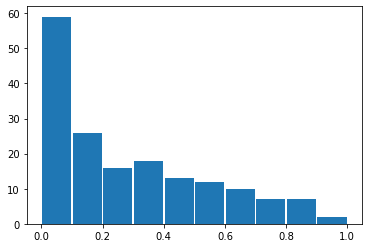

In [20]:
plt.hist(df['OPR'][ (((df['OPR_30'] < 0.7) & (df['CPR_30'] > 0.7)) | ((df['OPR_30'] < 0.2) & (df['CPR_30'] > 0.6))) & (df['Gap%'] < -0.15) ],rwidth=0.95,bins=bin_range)

In [21]:
df['OPR'][ (((df['OPR_30'] < 0.7) & (df['CPR_30'] > 0.7)) | ((df['OPR_30'] < 0.2) & (df['CPR_30'] > 0.6))) & (df['Gap%'] > 0.3) ].describe()

count    188.000000
mean       0.233296
std        0.244425
min        0.000000
25%        0.041525
50%        0.122665
75%        0.404875
max        0.914374
Name: OPR, dtype: float64

(array([83., 33., 11., 14., 11., 14., 11.,  6.,  4.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

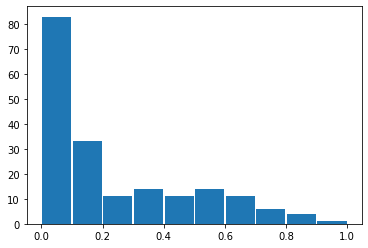

In [22]:
plt.hist(df['OPR'][ (((df['OPR_30'] < 0.7) & (df['CPR_30'] > 0.7)) | ((df['OPR_30'] < 0.2) & (df['CPR_30'] > 0.6))) & (df['Gap%'] > 0.3) ],rwidth=0.95,bins=bin_range)

#### From the above charts we can infer that strong 15min candle in direction of the open is a good indicator for not to go short on that day compared to gap down open

### Analysis of days with strong bias ( gap & 15min alignment )

### Up-moves

In [23]:
df['Upper'][ (((df['OPR_30'] < 0.7) & (df['CPR_30'] > 0.7)) | ((df['OPR_30'] < 0.2) & (df['CPR_30'] > 0.6))) & (df['Gap%'] > 0.3) ].describe()

count    188.000000
mean       0.501273
std        0.485474
min       -0.000492
25%        0.141272
50%        0.344807
75%        0.759119
max        2.465353
Name: Upper, dtype: float64

In [24]:
df['Lower'][ (((df['OPR_30'] < 0.7) & (df['CPR_30'] > 0.7)) | ((df['OPR_30'] < 0.2) & (df['CPR_30'] > 0.6))) & (df['Gap%'] > 0.3) ].describe()

count    188.000000
mean       0.213648
std        0.466356
min       -0.000484
25%        0.000000
50%        0.000000
75%        0.201422
max        3.535250
Name: Lower, dtype: float64

In [25]:
df["Close~15min-High"][ (((df['OPR_30'] < 0.7) & (df['CPR_30'] > 0.7)) | ((df['OPR_30'] < 0.2) & (df['CPR_30'] > 0.6))) & (df['Gap%'] > 0.3) ].describe()

count    188.000000
mean       0.056874
std        0.805387
min       -4.926226
25%       -0.315643
50%        0.047513
75%        0.562835
max        1.990362
Name: Close~15min-High, dtype: float64

### Down moves

In [26]:
df['Upper'][ (((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))) & (df['Gap%'] < -0.15)].describe()

count    146.000000
mean       0.302530
std        1.058030
min       -0.000490
25%        0.000000
50%        0.000000
75%        0.175214
max       10.700618
Name: Upper, dtype: float64

In [27]:
df['Lower'][ (((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))) & (df['Gap%'] < -0.15)].describe()

count    146.000000
mean       0.614163
std        0.614349
min        0.000000
25%        0.208861
50%        0.479841
75%        0.739525
max        3.906579
Name: Lower, dtype: float64

In [28]:
df["Close~15min-Low"][ (((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))) & (df['Gap%'] < -0.15)].describe()

count    146.000000
mean      -0.050364
std        1.494696
min      -13.880460
25%       -0.399823
50%        0.079255
75%        0.556552
max        3.121534
Name: Close~15min-Low, dtype: float64

#### Again, it suggests that selling option can be a good strategy because the index doesn't make large moves

### Range for days preceding big moves

In [29]:
df['True_Range_ratio'].describe()

count    2349.000000
mean        1.266825
std         0.899291
min         0.246096
25%         0.756198
50%         1.059159
75%         1.502528
max        16.133046
Name: True_Range_ratio, dtype: float64

In [30]:
df['TRR_Next'][ df['True_Range_ratio'] > 1.5 ].describe()

count    590.000000
mean       1.743646
std        1.206384
min        0.556743
25%        1.077932
50%        1.455065
75%        2.049821
max       16.114694
Name: TRR_Next, dtype: float64

In [31]:
df['TRR_Next'][ df['True_Range_ratio'] < 0.8 ].describe()

count    681.000000
mean       0.930738
std        0.452871
min        0.276854
25%        0.607634
50%        0.817306
75%        1.144353
max        3.549769
Name: TRR_Next, dtype: float64

In [32]:
df['TRR_Prev'][ df['True_Range_ratio'] > 1.5 ].describe()

count    591.000000
mean       1.785917
std        1.392295
min        0.448267
25%        1.045147
50%        1.422224
75%        2.129040
max       16.133046
Name: TRR_Prev, dtype: float64

### Stop loss estimate

In [47]:
df["Close~15min-High"][(((df['OPR_30'] < 0.7) & (df['CPR_30'] > 0.7)) | ((df['OPR_30'] < 0.2) & (df['CPR_30'] > 0.6))) & ( df["Close~15min-High"] > -0.5) ].describe()

count    555.000000
mean       0.228147
std        0.505935
min       -0.499958
25%       -0.162048
50%        0.113587
75%        0.539076
max        2.545473
Name: Close~15min-High, dtype: float64

In [50]:
df["Close~15min-Low"][(((df['OPR_30'] > 0.3) & (df['CPR_30'] < 0.3)) | ((df['OPR_30'] > 0.8) & (df['CPR_30'] < 0.4))) & ( df["Close~15min-Low"] > -1 )  ].describe()

count    717.000000
mean       0.129493
std        0.667267
min       -0.999229
25%       -0.297421
50%        0.029062
75%        0.468656
max        4.279023
Name: Close~15min-Low, dtype: float64

### 15min range Analysis

In [34]:
df['True_Range_ratio_30'].describe()

count    2348.000000
mean        0.614468
std         0.518677
min         0.141771
25%         0.373492
50%         0.508071
75%         0.723908
max        16.019594
Name: True_Range_ratio_30, dtype: float64

In [35]:
df['True_Range_ratio'].describe()

count    2349.000000
mean        1.266825
std         0.899291
min         0.246096
25%         0.756198
50%         1.059159
75%         1.502528
max        16.133046
Name: True_Range_ratio, dtype: float64

In [36]:
df['Range~Prev_Close'].describe()

count    2348.000000
mean        1.265893
std         0.897377
min         0.247007
25%         0.756513
50%         1.059755
75%         1.499881
max        16.728188
Name: Range~Prev_Close, dtype: float64

In [37]:
df['True_Range_ratio_30'][ df['Range~Prev_Close'] < 0.75 ].describe()

count    576.000000
mean       0.373385
std        0.113750
min        0.158175
25%        0.285286
50%        0.361821
75%        0.451072
max        0.738417
Name: True_Range_ratio_30, dtype: float64

In [38]:
df['True_Range_ratio_30'][ df['Range~Prev_Close'] > 1.5 ].describe()

count    587.000000
mean       0.962142
std        0.884006
min        0.173985
25%        0.555125
50%        0.798770
75%        1.064505
max       16.019594
Name: True_Range_ratio_30, dtype: float64

In [39]:
df['Range~Prev_Close'][ df['True_Range_ratio_30'] < 0.4 ].describe()

count    725.000000
mean       0.875378
std        0.432942
min        0.247007
25%        0.577478
50%        0.760777
75%        1.058262
max        3.189179
Name: Range~Prev_Close, dtype: float64

In [40]:
df['Range~Prev_Close'][ df['True_Range_ratio_30'] > 0.72 ].describe()

count    596.000000
mean       1.959169
std        1.337081
min        0.724707
25%        1.253866
50%        1.673472
75%        2.246654
max       16.728188
Name: Range~Prev_Close, dtype: float64

In [45]:
df['Upper'].describe()

count    2348.000000
mean        0.286483
std         0.509230
min        -0.123457
25%         0.000000
50%         0.095389
75%         0.392437
max        10.700618
Name: Upper, dtype: float64

In [46]:
df['Lower'].describe()

count    2348.000000
mean        0.364942
std         0.512766
min        -0.007645
25%         0.000000
50%         0.180813
75%         0.530516
max         4.967659
Name: Lower, dtype: float64

In [41]:
df['Upper'][ df['True_Range_ratio_30'] < 0.4 ].describe()

count    725.000000
mean       0.234142
std        0.326147
min       -0.000496
25%        0.000000
50%        0.119386
75%        0.329234
max        2.542427
Name: Upper, dtype: float64

In [42]:
df['Lower'][ df['True_Range_ratio_30'] < 0.4 ].describe()

count    725.000000
mean       0.326290
std        0.411575
min       -0.000486
25%        0.016032
50%        0.187359
75%        0.458144
max        2.574431
Name: Lower, dtype: float64

In [43]:
df['Upper'][ df['True_Range_ratio_30'] > 0.72 ].describe()

count    596.000000
mean       0.377171
std        0.752884
min       -0.123457
25%        0.000000
50%        0.064094
75%        0.536806
max       10.700618
Name: Upper, dtype: float64

In [44]:
df['Lower'][ df['True_Range_ratio_30'] > 0.72 ].describe()

count    596.000000
mean       0.464613
std        0.694416
min       -0.007645
25%        0.000000
50%        0.128456
75%        0.692238
max        4.967659
Name: Lower, dtype: float64

In [47]:
df['Lower'][ df['OPR'] > 0.79].describe()

count    753.000000
mean       0.698379
std        0.647020
min        0.000000
25%        0.254223
50%        0.540169
75%        0.919462
max        4.967659
Name: Lower, dtype: float64

In [48]:
df['Upper'][ df['OPR'] < 0.21].describe()

count    544.000000
mean       0.660814
std        0.640221
min        0.000000
25%        0.233618
50%        0.509313
75%        0.901295
max        5.712358
Name: Upper, dtype: float64